In [208]:
include("PVCR.jl");

# Residential Cases

In [209]:
consumption = 100:50:500
capacity = 0.1:0.1:3

results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    residential.econsumption = co; get_pmax(residential);
    for (jx, ca) in enumerate(capacity)
    PVRes.capacity = ca
    results[ix,jx] = mean(PV_netcost(residential, PVRes, BAC1))  
    end
end

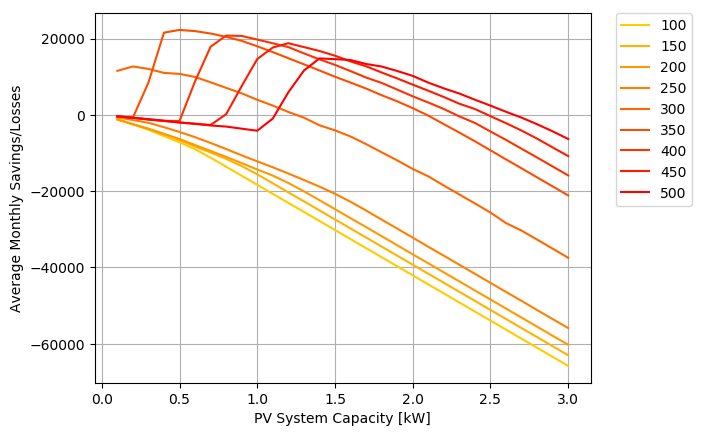

In [210]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co, color=(1.0, 1.0*((500-co)/500), 0.0))
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("Average Monthly Savings/Losses")
grid("on");

In [211]:
consumption = 500:100:1000
capacity = 0.1:0.1:6

results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    residential.econsumption = co; get_pmax(residential);
    for (jx, ca) in enumerate(capacity)
    PVRes.capacity = ca
    results[ix,jx] = mean(PV_netcost(residential, PVRes, BAC1))  
    end
end

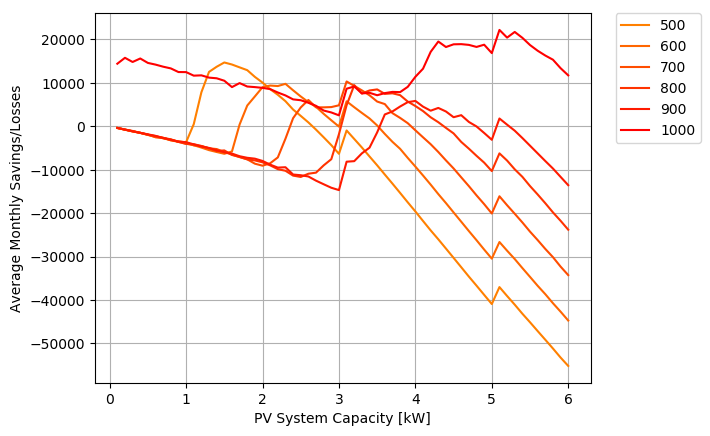

In [212]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co, color=(1.0, 1.0*((1000-co)/1000), 0.0))
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("Average Monthly Savings/Losses")
grid("on");

# Commercial Industrial Cases

In [213]:
consumption = 500:500:3000
capacity = 1:0.5:15

results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    commercial.econsumption = co; get_pmax(commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    results[ix,jx] = npv(sum(PV_netcost(commercial, PVComInd, BAC1), dims=1), 0.11) 
    end
end

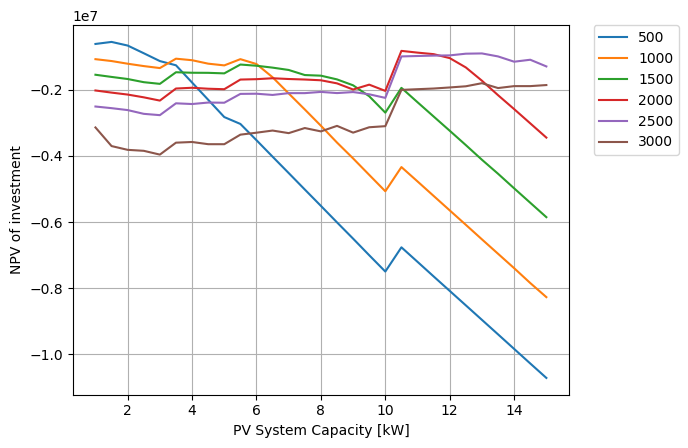

In [214]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co)
end
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV of investment")
grid("on");

In [215]:
consumption = 2800:500:6000
capacity = 1:0.5:15

results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    commercial.econsumption = co; get_pmax(commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    results[ix,jx] = npv(sum(PV_netcost(commercial, PVComInd, BAC1), dims=1), 0.11) 
    end
end

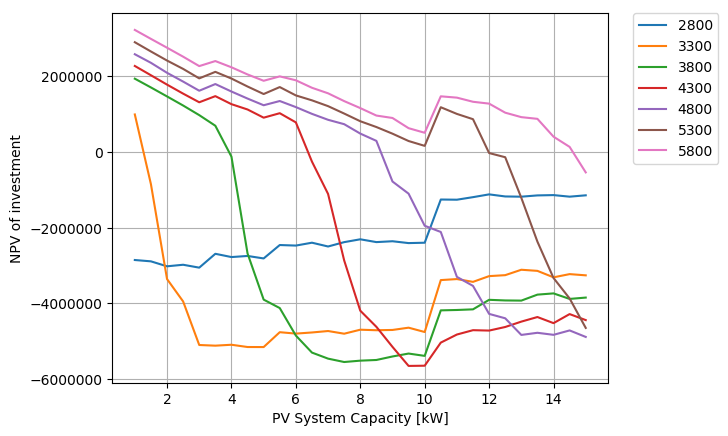

In [216]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co)
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV of investment")
grid("on");

In [217]:
consumption = 6000:500:10000
capacity = 1:0.5:30

results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    commercial.econsumption = co; get_pmax(commercial);
    for (jx, ca) in enumerate(capacity)
    PVComInd.capacity = ca
    results[ix,jx] = npv(sum(PV_netcost(commercial, PVComInd, BAC1), dims=1), 0.11) 
    end
end

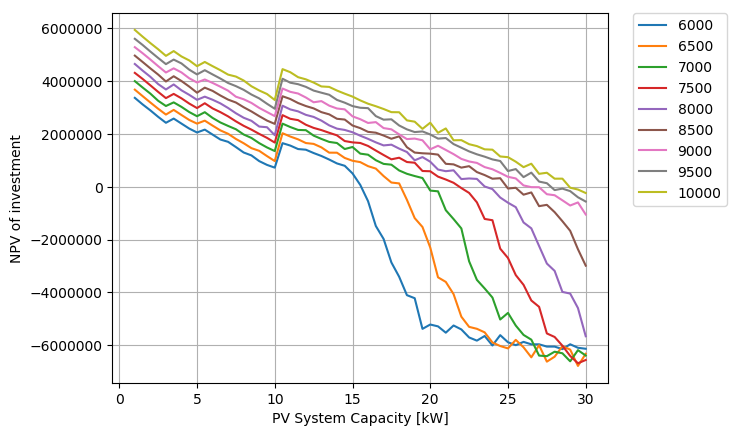

In [218]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co)
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("NPV of investment")
grid("on");

# Medium Voltage Cases

In [227]:
consumption = 10000:10000:100000
capacity = 100:1:150

results = Array{Float64,2}(undef, length(consumption), length(capacity))

for (ix, co) in enumerate(consumption)
    mediumvoltage.econsumption = co; get_pmax(mediumvoltage);
    for (jx, ca) in enumerate(capacity)
    PVTMT.capacity = ca
    results[ix,jx] = npv(sum(PV_netcost(mediumvoltage, PVTMT, BAC1), dims=1),0.08)
    end
end

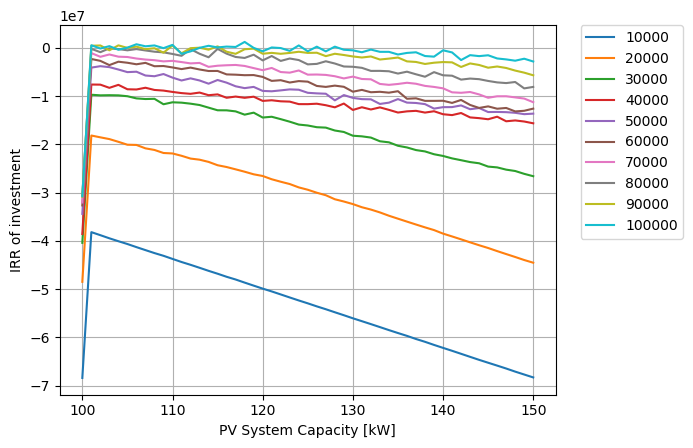

In [228]:
for (ix, co) in enumerate(consumption)
    plot(collect(capacity),results[ix,:], label = co)
end

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
xlabel("PV System Capacity [kW]")
ylabel("IRR of investment")
grid("on");